In [1]:
# --- Import Libraries ---
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import random

In [2]:
# --- Load Dataset ---
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [61]:
# Show dataset shapes
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


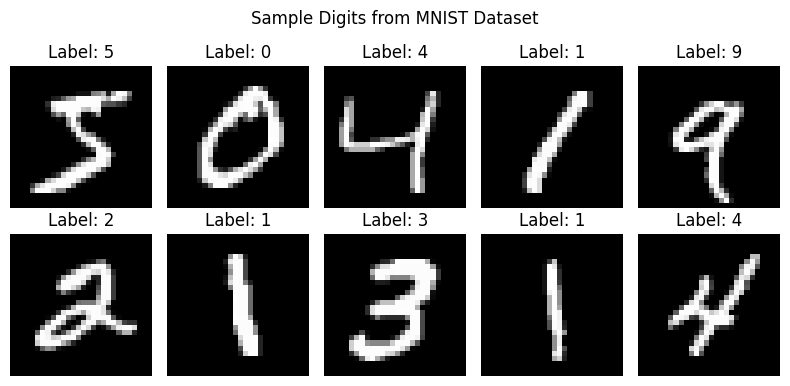

In [3]:
# --- Visualize Sample Digits ---
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Digits from MNIST Dataset")
plt.tight_layout()
plt.show()

In [4]:
# --- Preprocess Data ---
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
# --- Build Neural Network ---
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# --- Compile the Model ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# --- Train the Model ---
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3672 - accuracy: 0.8974 - val_loss: 0.1861 - val_accuracy: 0.9463
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1518 - accuracy: 0.9551 - val_loss: 0.1383 - val_accuracy: 0.9608
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1079 - accuracy: 0.9682 - val_loss: 0.1164 - val_accuracy: 0.9659
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9743 - val_loss: 0.1030 - val_accuracy: 0.9692
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0644 - accuracy: 0.9810 - val_loss: 0.1016 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0533 - accuracy: 0.9842 - val_loss: 0.0913 - val_accuracy: 0.9731
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0432 - accuracy: 0.9874 - val_loss: 0.0935 - val_accuracy: 0.9715
Epoch 

In [8]:
# --- Evaluate the Model ---
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

313/313 [==============================] - 0s 821us/step - loss: 0.0845 - accuracy: 0.9776
Test Loss: 0.0845, Test Accuracy: 0.9776


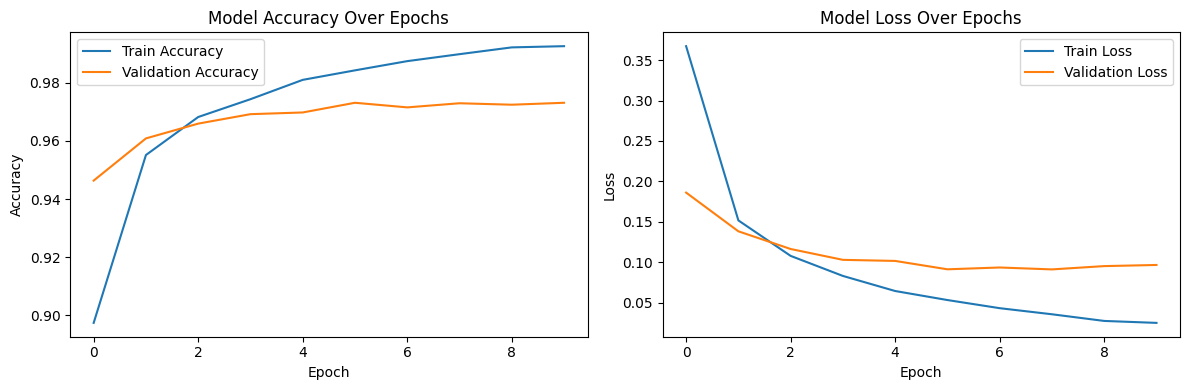

In [9]:
# --- Plot Training History ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 [==============================] - 0s 739us/step

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.99      0.97       892
           6       0.97      0.98      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



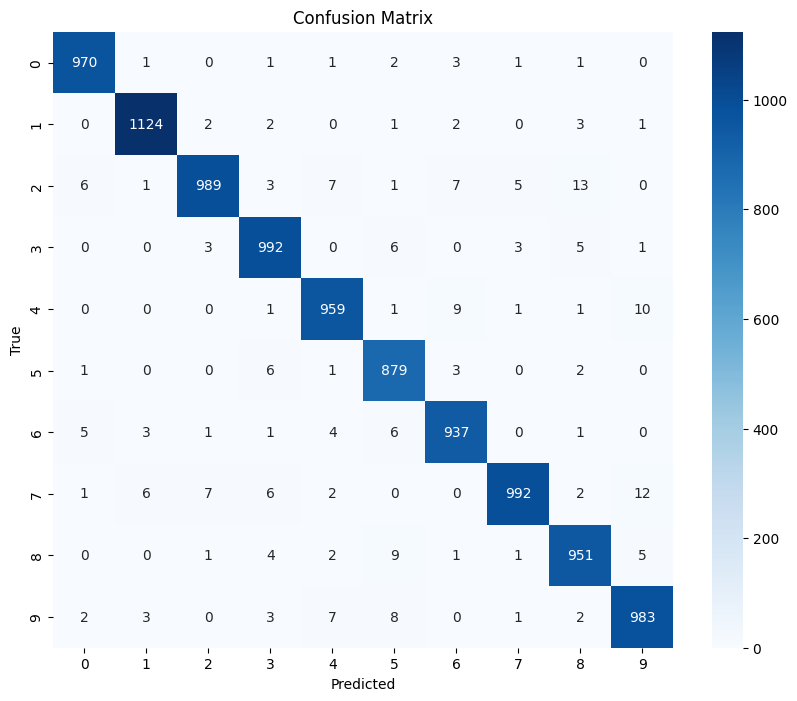

In [10]:
# --- Classification Report and Confusion Matrix ---
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [11]:
# --- Predict Sample Digits ---
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 0s 792us/step


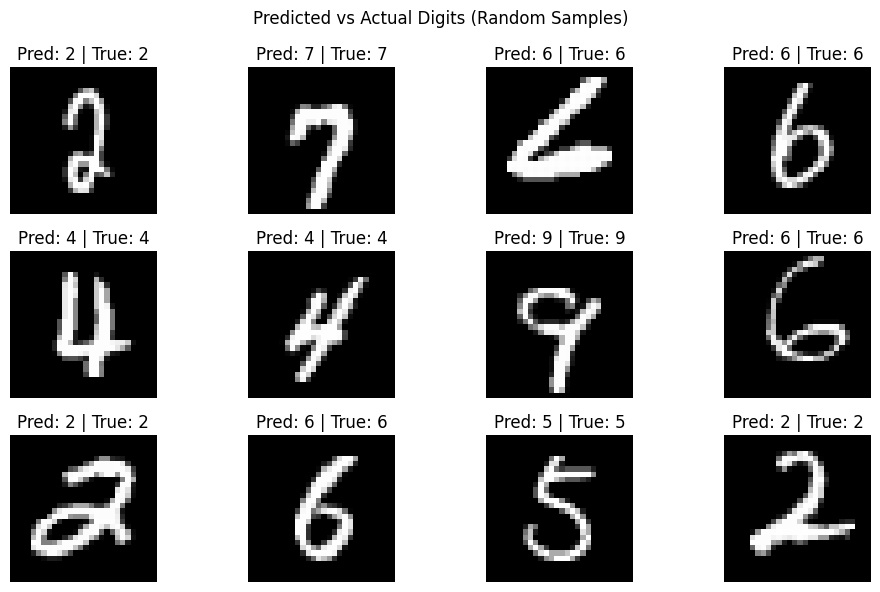

In [13]:
# Select 12 random indices
random_indices = random.sample(range(len(X_test)), 12)

plt.figure(figsize=(10, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Pred: {predicted_labels[idx]} | True: {y_test[idx]}")
    plt.axis('off')
plt.suptitle("Predicted vs Actual Digits (Random Samples)")
plt.tight_layout()

# Save the figure for deliverable
plt.savefig("digit_predictions_screenshot.png")
plt.show()